### Réalisé par : ESSABBAHI Abdelmaoula et LAAJAJ Younes

#### 1. Sur la base de données Mouse

In [1]:

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

##### a) Chargement des données et leur analyse

In [6]:

points = pd.read_csv('./mouse.txt',sep=' ',names=['X1','X2'])
print(points.describe())

               X1          X2
count  500.000000  500.000000
mean     0.505892    0.599706
std      0.191763    0.156863
min      0.040555    0.138940
25%      0.328481    0.469010
50%      0.504702    0.629494
75%      0.681430    0.735364
max      0.916030    0.897028


##### b) Visualisation des données

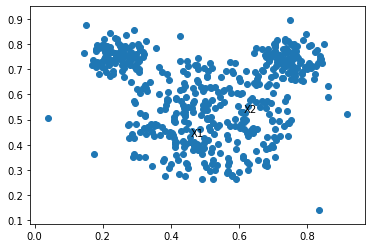

In [7]:

rng = np.random.RandomState(42)

# Les points sont tracés à l'aide de scatter
plt.scatter(points['X1'], points['X2'])
labels = ['X1', 'X2']
for label, x, y in zip(labels, points['X1'], points['X2']):
    plt.annotate(label, xy=(x, y),textcoords='offset points')
plt.show()


##### c) Construction du modèle de prédiction

In [9]:

clf = IsolationForest(max_samples=100, random_state=rng)
points_n = StandardScaler().fit_transform(points)
clf = clf.fit(points_n)
outlier = clf.predict(points_n)

##### d) Visualiser les données aberrantes 

---------------------
(500,)
---------------------


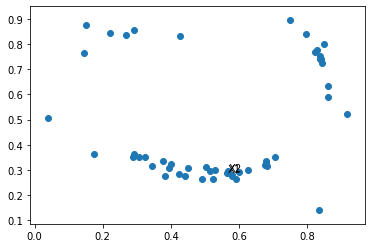

In [12]:

#Choisir 1 pour visualiser la bonne figure
outliers_ = points[outlier==-1]
       
plt.scatter(outliers_['X1'], outliers_['X2'])
for label, x, y in zip(labels, outliers_['X1'], outliers_['X2']):
    plt.annotate(label, xy=(x, y),textcoords='offset points')
plt.show()

Les données aberrantes sont obtenues depuis les valeurs de la prédiction, les données correspondantes à -1 sont celles aberrantes, et sont par la suite tracées dans une figure. Nous avons décidé de normaliser la base de données, car il s'agit d'une pratique indispensable en Machine Learning.



#### 2. Sur le jeu de données des cartes de crédits

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
instances = pd.read_csv('./creditcard.csv',sep=',')

sc = StandardScaler()
slice1 = instances.loc[instances['Class'] == 0]

df_random_choice = slice1.sample(n=5000)

slice2 = instances.loc[instances['Class'] == 1]

prepared_data = df_random_choice.append(slice2, ignore_index=True)

prepared_data = prepared_data.drop('Time', 1)

X=prepared_data.iloc[:,:-1].values
Y=prepared_data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state =0)

#Prediction en utilisant Isolation Forest

Intance_Isolation_Forest = IsolationForest(contamination=0.0984)
sc.fit(x_train)
x_train_norm = sc.transform(x_train)
x_test_norm = sc.transform(x_train)
Intance_Isolation_Forest.fit(x_train_norm,y_train)
result=Intance_Isolation_Forest.predict(x_test_norm)
result = np.where(result==-1,1,0)



On construit notre matrice de confusion:

 1. Les prédictions en colonnes
 2. Le statut des instances dans la base de donnée originale dans les lignes.

In [3]:
from sklearn.metrics import confusion_matrix, classification_report

target=prepared_data['Class']

conf=pd.DataFrame(confusion_matrix(result,y_test))
conf.columns=['Predict Normal','Predict Fraud']
conf.index=['Normal','Fraud']
print(conf)
print(classification_report(result, y_test)) 

        Predit Normal  Predit Fraud
Normal           2265           210
Fraud             246            25
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2475
           1       0.11      0.09      0.10       271

    accuracy                           0.83      2746
   macro avg       0.50      0.50      0.50      2746
weighted avg       0.82      0.83      0.83      2746



Le Rappel pour le cas de fraude est de 9% ce qui est très faible et permet donc de prédire 91% des fraudes comme des opérations normales. l'accuracy est bonne (83%) mais il va falloir améliorer le rappel(fraud).